# Estudo da equação de Colebroke


In [276]:
import numpy as np
import pandas as pd
import math
import sympy as sp
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [277]:
sp. init_printing(use_latex='png', scale=1.0, order='grlex',
                    forecolor='Black', backcolor='White')
x = sp.Symbol('x')

In [278]:
# rugosidade da tubulação
E = 1
# Diâmetro interno da tubulação
D = 1
# nº de reynolds para o fluido em questão
re = 1
# função fator de atrito

##### Erro relativo

In [279]:
def erro_relativo(m, n):
    erro = math.sqrt(math.pow(m - n, 2) / math.sqrt(math.pow(m, 2))) * 100
    return erro

##### Equação de Colebroke:

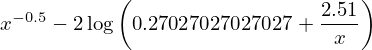

In [280]:
function = 1 / x ** (1/2) - 2 * sp.log((E / (D * 3.7) + (2.51 / (re * x))))
function

##### Derivada da equação de Colebroke

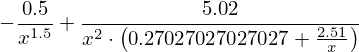

In [281]:
derivada = function.diff()
derivada

In [282]:
x_estimado = []
f_estimado = []
erro_estimado = []

In [283]:
def newton_raphson(tol):
    global erro
    erro = 1
    y = 1
    i = 0
    c = 4.8
    while tol < erro:
        y = c - function.subs({x:c}) / derivada.subs({x:c})
        i = i + 1
        erro = erro_relativo(y, c)
        c = y
        x_estimado.append(y)
        f_estimado.append(function.subs({x:y}))
        erro_estimado.append(erro)

    return print('processo finalizado: {}'.format(c))

In [284]:
r = float(input('digite a ordem da tolerancia:\n'))
newton_raphson(r)

processo finalizado: 2.22534632770277


In [285]:
data_df = pd.DataFrame({
    'x estimado': x_estimado,
    'f estimado': f_estimado,
    'erro associado': erro_estimado

})
data_df

,x estimado,f estimado,erro associado
0,0.750505823054011,-1.41569606512463,467.437710
1,1.58493980102466,-0.440295232698661,66.280472
2,2.11712461577717,-0.0638977939674874,36.575415
3,2.22239446513204,-0.00169678208685875,7.061443
4,2.22534414846854,-1.25173851617255e-6,0.197732
5,2.22534632770277,-6.82010004027234e-13,0.000146


C:\Users\alana\AppData\Local\Temp\ipykernel_32672\3462530384.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, m1, 'k--', color='red')
C:\Users\alana\AppData\Local\Temp\ipykernel_32672\3462530384.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, m2, 'k', color='green')


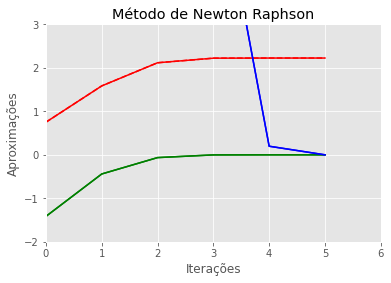

In [286]:
plt.style.use('seaborn-bright')
fig = plt.figure()
m1 = data_df['x estimado']
m2 = data_df['f estimado']
m3 = data_df['erro associado']
x = np.array(range(len(m1)))

plt.plot(x, m1, 'r')
plt.plot(x, m1, 'k--', color='red')

plt.plot(x, m2, 'g')
plt.plot(x, m2, 'k', color='green')

plt.plot(x, m3, 'b')
plt.plot(x, m3, color='blue')

plt.axis([0,6,-2,3])
plt.xlabel('Iterações')
plt.ylabel('Aproximações')
plt.title('Método de Newton Raphson')
plt.grid(True)

plt.show()

C:\Users\alana\anaconda3\envs\mathplots\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


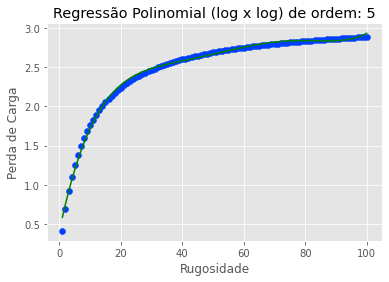

In [287]:
rugosidade = lambda x: - 2 * np.log10((E / (D * 3.7) + (2.51 / (re * x))))
list_rugosidade = []
start = 1
end = 100
spaces = 100
for x in np.linspace(start, end, spaces):
    list_rugosidade.append(rugosidade(x))

x_interval = np.log(np.linspace(start, end, spaces))
xdic = {'X':np.exp(x_interval)}
ydic = {'Y':np.exp(list_rugosidade)}

X = pd.DataFrame.from_dict(xdic)
Y = pd.DataFrame.from_dict(ydic)

x_SEQ = np.linspace(X.min(),X.max(),spaces).reshape(-1,1)

value = 5 # grau do polinômio

polynomial_regression = make_pipeline(PolynomialFeatures(value),LinearRegression())
polynomial_regression.fit(X,Y)

plt.figure()
plt.scatter(X,Y)
plt.plot(x_SEQ, polynomial_regression.predict(x_SEQ),color='Green')
plt.title('Regressão Polinomial (log x log) de ordem: '+str(value))
plt.grid(True)
plt.xlabel("Rugosidade")
plt.ylabel("Perda de Carga")
plt.show()
